In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error, r2_score, confusion_matrix

In [124]:
df = pd.read_excel("CalorificValue.xlsx")

In [125]:
df

,INGREDIENT,Gram,Cal/100gms,Cal/gm,Quantity Added (in Grams),Calories,Unnamed: 6,Calories Calculated Value
0,Almonds,100,609.2,6.092,NaN,0,NaN,0.0
1,Amaranth leaves,100,30.5,0.305,NaN,0,NaN,NaN
2,"Amaranth seed, Black",100,356.1,3.561,NaN,0,NaN,NaN
3,Anise seeds,100,153.3,1.533,NaN,0,NaN,NaN
4,Apple,100,62.3,0.623,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...
175,Wheat vermicelli,100,332.6,3.326,NaN,0,NaN,NaN
176,Wheat whole,100,321.9,3.219,NaN,0,NaN,NaN
177,Wood apple,100,78.1,0.781,NaN,0,NaN,NaN
178,Yam,100,84.3,0.843,NaN,0,NaN,NaN


In [126]:
df = df.drop(["Quantity Added (in Grams)", "Calories", "Unnamed: 6", "Calories Calculated Value"], axis=1)

In [127]:
df

,INGREDIENT,Gram,Cal/100gms,Cal/gm
0,Almonds,100,609.2,6.092
1,Amaranth leaves,100,30.5,0.305
2,"Amaranth seed, Black",100,356.1,3.561
3,Anise seeds,100,153.3,1.533
4,Apple,100,62.3,0.623
...,...,...,...,...
175,Wheat vermicelli,100,332.6,3.326
176,Wheat whole,100,321.9,3.219
177,Wood apple,100,78.1,0.781
178,Yam,100,84.3,0.843


In [128]:
df.describe()

,Gram,Cal/100gms,Cal/gm
count,180.0,180.000000,180.000000
mean,100.0,184.284722,1.842847
std,0.0,183.456068,1.834561
min,100.0,10.900000,0.109000
25%,100.0,37.425000,0.374250
50%,100.0,99.950000,0.999500
75%,100.0,320.200000,3.202000
max,100.0,920.000000,9.200000


In [129]:
df.isna().sum()

INGREDIENT    0
Gram          0
Cal/100gms    0
Cal/gm        0
dtype: int64

In [130]:
def generate_additional_data(df, iterations, factor):
    for _ in range(iterations):
        df1 = df.copy()
        df1.drop(["Gram", "Cal/100gms"], axis=1, inplace=True)
        gram = np.random.randint(1, 1001, len(df1)) * factor
        df1.insert(1, "Gram", gram)
        df1.insert(2, "Cal/100gms", df1["Gram"] * df1["Cal/gm"])
        df = df.append(df1, ignore_index=True)
    return df

In [131]:
df = generate_additional_data(df, iterations=9, factor=1)

df

C:\Users\Dhruv Gandhi\AppData\Local\Temp\ipykernel_31952\2845826108.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1, ignore_index=True)
C:\Users\Dhruv Gandhi\AppData\Local\Temp\ipykernel_31952\2845826108.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1, ignore_index=True)
C:\Users\Dhruv Gandhi\AppData\Local\Temp\ipykernel_31952\2845826108.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1, ignore_index=True)
C:\Users\Dhruv Gandhi\AppData\Local\Temp\ipykernel_31952\2845826108.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1, ignore_index=True)
C:\Users

,INGREDIENT,Gram,Cal/100gms,Cal/gm
0,Almonds,100,609.200,6.092
1,Amaranth leaves,100,30.500,0.305
2,"Amaranth seed, Black",100,356.100,3.561
3,Anise seeds,100,153.300,1.533
4,Apple,100,62.300,0.623
...,...,...,...,...
92155,Wheat vermicelli,778,2587.628,3.326
92156,Wheat whole,440,1416.360,3.219
92157,Wood apple,832,649.792,0.781
92158,Yam,10,8.430,0.843


In [132]:
df.rename(columns={"Cal/100gms": "Total Calorie"}, inplace=True)
df

,INGREDIENT,Gram,Total Calorie,Cal/gm
0,Almonds,100,609.200,6.092
1,Amaranth leaves,100,30.500,0.305
2,"Amaranth seed, Black",100,356.100,3.561
3,Anise seeds,100,153.300,1.533
4,Apple,100,62.300,0.623
...,...,...,...,...
92155,Wheat vermicelli,778,2587.628,3.326
92156,Wheat whole,440,1416.360,3.219
92157,Wood apple,832,649.792,0.781
92158,Yam,10,8.430,0.843


In [133]:
X = df[["INGREDIENT", "Gram"]]
Y = df["Total Calorie"]

X

,INGREDIENT,Gram
0,Almonds,100
1,Amaranth leaves,100
2,"Amaranth seed, Black",100
3,Anise seeds,100
4,Apple,100
...,...,...
92155,Wheat vermicelli,778
92156,Wheat whole,440
92157,Wood apple,832
92158,Yam,10


In [134]:
Y

0         609.200
1          30.500
2         356.100
3         153.300
4          62.300
           ...   
92155    2587.628
92156    1416.360
92157     649.792
92158       8.430
92159      21.200
Name: Total Calorie, Length: 92160, dtype: float64

In [135]:
encoder = LabelEncoder()

In [136]:
X["INGREDIENT"] = encoder.fit_transform(X["INGREDIENT"])

C:\Users\Dhruv Gandhi\AppData\Local\Temp\ipykernel_31952\3675886579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["INGREDIENT"] = encoder.fit_transform(X["INGREDIENT"])


In [137]:
# Print column name and its corresponding encoding
print("Column Name\t\tEncoding")
for value, encoded_value in zip(df['INGREDIENT'].unique(), X["INGREDIENT"]):
    print(f"{encoded_value}\t\t\t{value}")

Column Name		Encoding
0			Almonds
1			Amaranth leaves
2			Amaranth seed, Black
3			Anise seeds
4			Apple
5			Apricot, dried
6			Arecanut dried
7			Asafoetida
8			Ash gourd
9			Avocado
10			Bajra
11			Bamboo shoot, tender
12			Banana
13			Barley
14			Basil seeds
15			Beef, chops
16			Beet greens
17			Beetroot
18			Bengal gram, dal
19			Bengal gram, whole
20			Bitter gourd
21			Black cumin (Kalonji)
22			Black gram, whole
23			Blackberry fruit
24			Blackcurrants
25			Bottle gourd
26			Brinjal
27			Broad beans
28			Brown Rice
29			Brussels sprouts
30			Bulgar wheat
31			Butter
32			Cabbage Chinese
33			Cabbage, green
34			Capsicum
35			Cardamom, green
36			Carrot
37			Cashew nut
38			Cat fish
39			Catla
40			Cauliflower
41			Cauliflower, leaves
42			Celery stalk
43			Cheese
44			Cherries red
45			Chia seeds
46			Chicken, breast,
47			Chicken, leg, skinless
48			Chicken, liver
49			Chicken, thigh,
50			Cho-Cho- Marrow
51			Clam
52			Cloves
53			Cluster beans
54			Coconut dry
55			Coconut f

In [138]:
encoding_dict = {}

for value, encoded_value in zip(df['INGREDIENT'].unique(), X["INGREDIENT"]):
    encoding_dict[value] = encoded_value

print("Encoding dictionary:")
print(encoding_dict)

Encoding dictionary:
{'Almonds': 0, 'Amaranth leaves': 1, 'Amaranth seed, Black': 2, 'Anise seeds': 3, 'Apple': 4, 'Apricot, dried': 5, 'Arecanut dried': 6, 'Asafoetida': 7, 'Ash gourd': 8, 'Avocado': 9, 'Bajra': 10, 'Bamboo shoot, tender': 11, 'Banana': 12, 'Barley': 13, 'Basil seeds': 14, 'Beef, chops': 15, 'Beet greens': 16, 'Beetroot': 17, 'Bengal gram, dal': 18, 'Bengal gram, whole': 19, 'Bitter gourd': 20, 'Black cumin (Kalonji)': 21, 'Black gram, whole': 22, 'Blackberry fruit': 23, 'Blackcurrants': 24, 'Bottle gourd': 25, 'Brinjal': 26, 'Broad beans': 27, 'Brown Rice': 28, 'Brussels sprouts': 29, 'Bulgar wheat': 30, 'Butter': 31, 'Cabbage Chinese': 32, 'Cabbage, green': 33, 'Capsicum': 34, 'Cardamom, green': 35, 'Carrot': 36, 'Cashew nut': 37, 'Cat fish': 38, 'Catla': 39, 'Cauliflower': 40, 'Cauliflower, leaves': 41, 'Celery stalk': 42, 'Cheese': 43, 'Cherries red': 44, 'Chia seeds': 45, 'Chicken, breast,': 46, 'Chicken, leg, skinless': 47, 'Chicken, liver': 48, 'Chicken, thigh,

In [139]:
encoding_dict.get("Almonds")

0

In [140]:
X

,INGREDIENT,Gram
0,0,100
1,1,100
2,2,100
3,3,100
4,4,100
...,...,...
92155,175,778
92156,176,440
92157,177,832
92158,178,10


In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.04, shuffle=True, random_state=101)

In [218]:
X_train

,INGREDIENT,Gram
14642,62,544
59326,106,903
48413,173,54
49316,176,127
75161,101,978
...,...,...
5695,115,924
73542,102,493
83281,121,75
83467,127,424


In [219]:
y_train

14642    106.080
59326    208.593
48413    172.908
49316    408.813
75161    408.804
          ...   
5695     672.672
73542    457.997
83281    163.050
83467    231.928
45919    912.660
Name: Total Calorie, Length: 88473, dtype: float64

In [220]:
# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
linear_reg_pred = linear_reg_model.predict(X_test)
linear_reg_mae = mean_absolute_error(y_test, linear_reg_pred)
linear_reg_mse = mean_squared_error(y_test, linear_reg_pred)
linear_reg_r2 = r2_score(y_test, linear_reg_pred)

In [221]:
# Decision Trees
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)
decision_tree_pred = decision_tree_model.predict(X_test)
decision_tree_mae = mean_absolute_error(y_test, decision_tree_pred)
decision_tree_mse = mean_squared_error(y_test, decision_tree_pred)
decision_tree_r2 = r2_score(y_test, decision_tree_pred)

In [222]:
# Random Forests
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)
random_forest_pred = random_forest_model.predict(X_test)
random_forest_mae = mean_absolute_error(y_test, random_forest_pred)
random_forest_mse = mean_squared_error(y_test, random_forest_pred)
random_forest_r2 = r2_score(y_test, random_forest_pred)

In [223]:
# Gradient Boosting
gradient_boosting_model = GradientBoostingRegressor()
gradient_boosting_model.fit(X_train, y_train)
gradient_boosting_pred = gradient_boosting_model.predict(X_test)
gradient_boosting_mae = mean_absolute_error(y_test, gradient_boosting_pred)
gradient_boosting_mse = mean_squared_error(y_test, gradient_boosting_pred)
gradient_boosting_r2 = r2_score(y_test, gradient_boosting_pred)

In [224]:
# Print evaluation metrics
print("Linear Regression - MAE:", linear_reg_mae, "MSE:", linear_reg_mse, "R-squared:", linear_reg_r2)
print("Decision Trees - MAE:", decision_tree_mae, "MSE:", decision_tree_mse, "R-squared:", decision_tree_r2)
print("Random Forests - MAE:", random_forest_mae, "MSE:", random_forest_mse, "R-squared:", random_forest_r2)
print("Gradient Boosting - MAE:", gradient_boosting_mae, "MSE:", gradient_boosting_mse, "R-squared:", gradient_boosting_r2)

Linear Regression - MAE: 771.2693917156768 MSE: 1183836.938402952 R-squared: 0.2108988163092833
Decision Trees - MAE: 2.198984540276648 MSE: 38.134449805126124 R-squared: 0.9999745810098465
Random Forests - MAE: 2.3956911120152053 MSE: 31.336856744423944 R-squared: 0.99997911202975
Gradient Boosting - MAE: 525.4234490298036 MSE: 600641.299186794 R-squared: 0.5996350977177389


In [225]:
decision_tree_model.predict(X_test[:5])

array([182.043, 151.434, 197.386,  77.252, 140.812])

In [226]:
y_test[:5]

87758    182.580
20438    150.360
65246    197.386
48784     77.252
31190    140.812
Name: Total Calorie, dtype: float64

In [227]:
random_forest_model.predict(X_test[:5])

array([183.13848, 150.89163, 197.33126,  77.40152, 140.79696])

In [228]:
y_test[:5]

87758    182.580
20438    150.360
65246    197.386
48784     77.252
31190    140.812
Name: Total Calorie, dtype: float64

In [229]:
X_test[:5]

,INGREDIENT,Gram
87758,98,340
20438,98,280
65246,86,613
48784,4,124
31190,50,749


In [230]:
predicted_values_random_forest = random_forest_model.predict(X_test)
predicted_values_decision_tree = random_forest_model.predict(X_test)

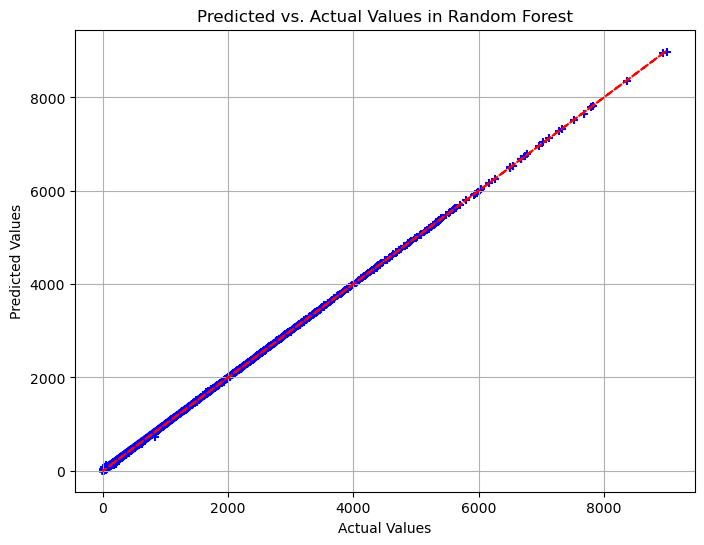

In [231]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicted_values_random_forest, color='blue', marker='+')
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.title('Predicted vs. Actual Values in Random Forest')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

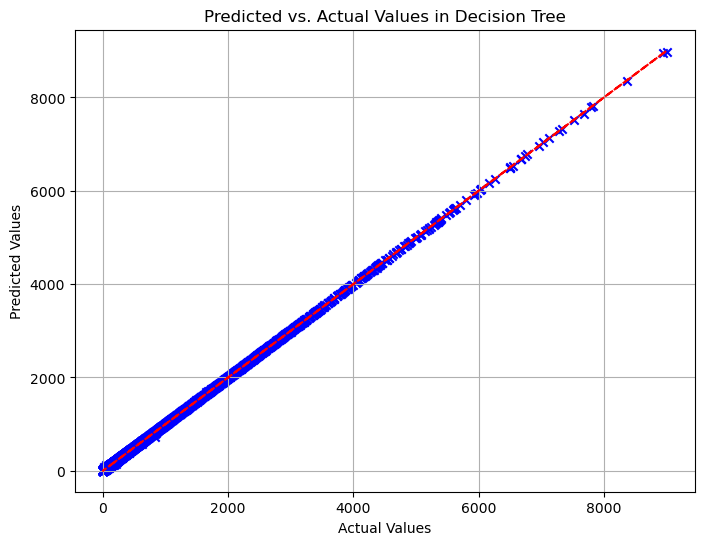

In [232]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicted_values_decision_tree, color='blue', marker='x')
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.title('Predicted vs. Actual Values in Decision Tree')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

In [233]:
decision_tree_model.predict([[10, 14]])

C:\Users\Dhruv Gandhi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([48.706])

In [234]:
random_forest_model.predict([[10, 14]])

C:\Users\Dhruv Gandhi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([46.20375])

In [235]:
def predict_calorie(ingredient, gram):    
    en = encoding_dict.get(ingredient)
    return decision_tree_model.predict([[en, gram]])[0]

In [236]:
ingredient = input("Enter the ingredient: ")
gram = input("Enter the gram: ")
predict_calorie(ingredient, gram)

Enter the ingredient: Bajra
Enter the gram: 150


C:\Users\Dhruv Gandhi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


518.371

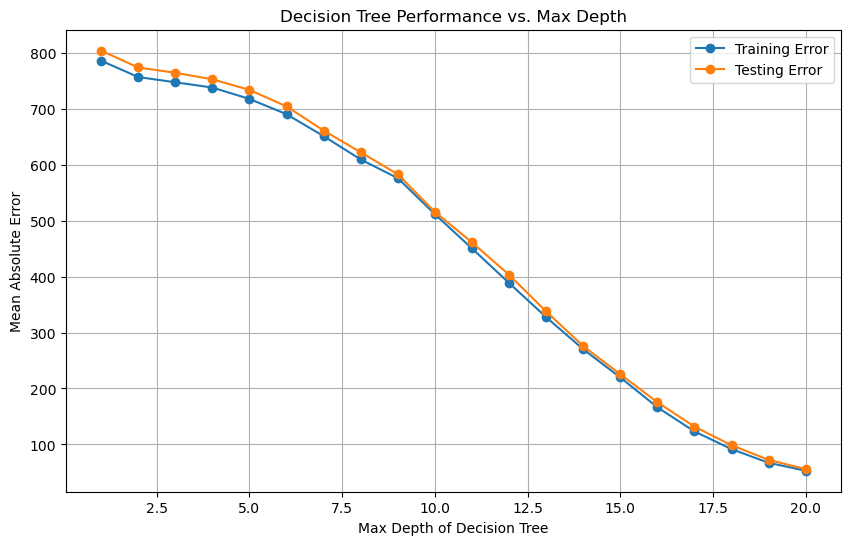

In [237]:
max_depths = np.arange(1, 21)  # Vary the maximum depth of the decision tree

train_errors = []
test_errors = []

for max_depth in max_depths:
    # Train a decision tree regressor
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(X_train, y_train)
    
    # Predictions on training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate MAE, MSE, and R-squared for training and testing data
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    train_errors.append(train_mae)
    test_errors.append(test_mae)

# Plotting the training and testing errors
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_errors, label='Training Error', marker='o')
plt.plot(max_depths, test_errors, label='Testing Error', marker='o')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Mean Absolute Error')
plt.title('Decision Tree Performance vs. Max Depth')
plt.legend()
plt.grid(True)
plt.show()

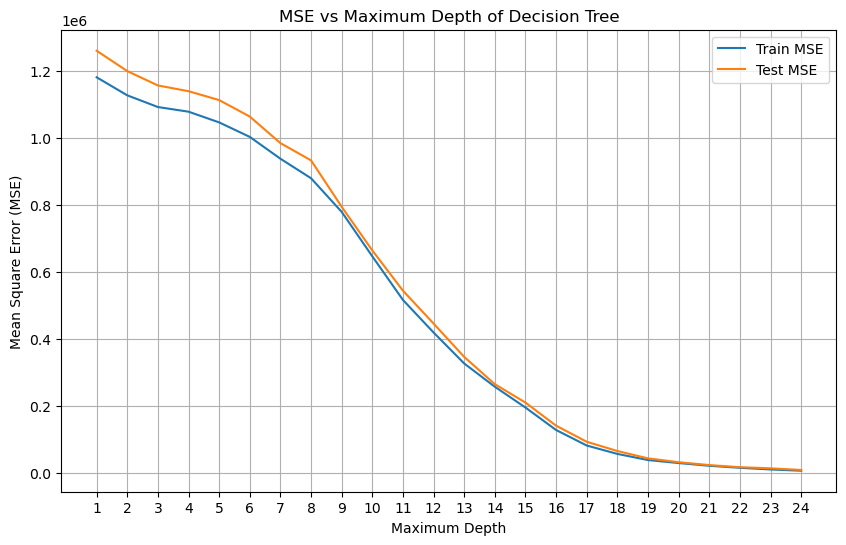

In [238]:
max_depths = np.arange(1, 25)  # Vary the maximum depth of the decision tree

train_mse = []
test_mse = []

for max_depth in max_depths:
    # Train a decision tree regressor
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(X_train, y_train)
    
    # Predictions on training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate MAE for training and testing data
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))

# Plotting MAE vs Maximum Depth
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_mse, label='Train MSE')
plt.plot(max_depths, test_mse, label='Test MSE')
plt.xlabel('Maximum Depth')
plt.ylabel('Mean Square Error (MSE)')
plt.title('MSE vs Maximum Depth of Decision Tree')
plt.xticks(max_depths)
plt.legend()
plt.grid(True)
plt.show()

In [239]:
pickle.dump(decision_tree_model, open("model.pkl", "wb"))

In [43]:
model = pickle.load(open("model.pkl","rb"))